# Gradient Boosting For Rregression

# Algorithm

$Input$: Data ${({x}_i,{y}_i)_{1}^{N}}$ and a Differentiable ${Loss-Function}$ ${L({y}_i,F({x}))}$.

${Step-[1]}$: Iinitialize model with a constant value.

\begin{equation}
F_{0}(x) = \underset{\gamma}{\mathrm{argmin}}\sum_{i=1}^{N}L({y}_i,{\gamma})
\end{equation}

${Step-[2]}$: for ${m=1}$ to ${M}$:

${[A]}$ -  compute.

\begin{equation}
r_{im} = -[\frac{\partial L({y}_i,F({x}_i))}{\partial F({x}_i)}]_{F(x) = F_{m-1}(x)}
\end{equation}

${[B]}-$ fit a Regression tree to the ${r_{im}}$ values and create terminal regions ${R_{jm}}$, for ${j}$=${1.....j_{m}}$.

${[C]}$- for ${j}$ = ${1.....j_{m}}$ compute.

\begin{equation}
{\gamma} = \underset{\gamma}{\mathrm{argmin}}\sum_{x_{i}\in{R_{ij}}}L({y}_i,F_{m-1}({x}_i) + {\gamma})
\end{equation}

${[D]}$ - Update.

\begin{equation}
F_{m}(x) = F_{m-1}(x) + {\mu}\sum_{j=1}^{j_{m}}{\gamma_{m}}I(x\in{R_{jm}})
\end{equation}

${Step}$ - Output ${F_{m}(x)}$.

# Let's start from the ${Input}$:

$Data$ ${({x}_i,{y}_i)_{i=1}^N}$, This is Describes in an abstract way the $Training Dataset$,and the method we will use to evaluate how will the $Model$ fits the $Training Dataset$.

now here we creating small sample dataset for explaining detailed math of this algorithm.

In [1]:
import pandas as pd

In [3]:
data = pd.DataFrame()

In [5]:
data['Height (m)'] = [1.6,1.6,1.5]

In [7]:
data['Favorite Color'] = ['Blue','Green','Blue']

In [8]:
data['Gender'] = ['Male','Female','Female']

In [9]:
data['Weight (kg)'] = [88,76,56]

In [10]:
data.head()

,Height (m),Favorite Color,Gender,Weight (kg)
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56


${x}_i$ is refer to each row of measurement that we will use to predict ${Weight}$.

and the  ${y}_i$  refer to the ${Weight}$ measurement for each person in the dataset.

and ${i=1}$ to N , this part just says that the ${i}$ in ${x_i}$ and ${y_i}$  go from $1$ to $N$  is the number of people in our dataset.

in this case ${N=3}$ since we only have three rows of data.

and a differenciable ${Loss Function}$ ${L({y}_i,F(x))}$.

in this case a $Loss Function$ is just somthing that evaluates how well we can predict $Weight$.

The $Loss Function$ that is Most commonly used when doing $Regression$ with $Gradient Boost$ is

\begin{equation}
\frac{1}{2}(observed-Predicted)^{2}
\end{equation}

Residual are differences between $observed$ $Weights$   and $Predicted$ $Weights$.

Thus the $Loss$ $Function$ or just a squared $Residual$ 

\begin{equation}
(observed -Predicted)^{2}
\end{equation}

$Explaination$

\begin{equation}
\frac{1}{2}(observed-Predicted)^2
\end{equation}

Now just for a few minutes igonre the ${\frac{1}{2}}$ in front.

when we remove the $\frac{1}{2}$ we end up with the same $Loss$ $Function$ we used for $Linear$ $Regression$.

In [15]:
import matplotlib.pyplot as plt

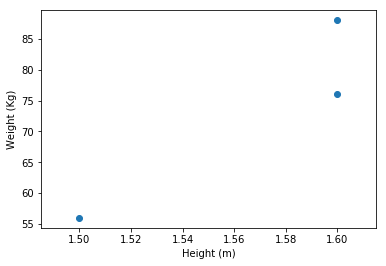

In [29]:
plt.scatter(data['Height (m)'],data['Weight (kg)'])
plt.xlabel('Height (m)')
plt.ylabel('Weight (Kg)')
plt.show()

$Residual$ are the differences between the $observed$ $Weights$ and  the $Weights$ that are predicted by  the line

we can evaluate how well this Green Line fits the Data with the sum of the squared $Residual$.

Thus the $Loss$ $Function$ is just squared $Residual$.

\begin{equation}
(observed - Predicted)^2
\end{equation}

if we wanted to compare how well this $Green$ $Line$ fit the Data to this $Pink$ $Line$.

then we  would calculate the $Residual$ the difference between the $observed$ and $predicted$ values for the Green Line.

$Residual$ $are$
\begin{equation}
(0.1) , (-0.4), (0.3)
\end{equation}

$square$ then
\begin{equation}
(0.1)^{2} ,(-0.4)^{2},(0.3)^{2}
\end{equation}

$Add$
\begin{equation}
(0.1)^2 + (-0.4)^2 + (0.3)^2 = 0.26
\end{equation}

for $sum$ $of$ $the$ $squared$ $Residual$ for the Green line.

Then we do same thinks for Pink Line. 

\begin{equation}
(1.1)^2 + (0.9)^2 + (2.1)^2 = 6.43
\end{equation}

you can see that the $0.26$ of the Green Line is smaller than the Pink Line $6.43$.

so the Green Line is a better fit because the $sum$ $of$ $the$ $squared$ $Residual$ is smaller than Pink Line.

$Note$.-> if we Multiply  Both side by $\frac{1}{2}$ 

\begin{equation}
\frac{1}{2}[(0.1)^2 + (-0.4)^2 + (0.3)^2] = \frac{1}{2}[0.26] = 0.13
\end{equation}

\begin{equation}
\frac{1}{2}[(1.1)^2 + (0.9)^2 + (2.1)^2] = \frac{1}{2}[6.43] = 3.21
\end{equation}

but we would still know that the Green Line fits the Data better since it's Number  is still relatively smaller.

in other word's if does not matter if the $Loss$ $Function$ is .

\begin{equation}
(observed - Predicted)^2
\end{equation}

of if it's.

\begin{equation}
\frac{1}{2}(observed - predicted)^2
\end{equation}

sices both will tell that the Green Line has Best fit.

The Reasone why people choose this $Loss$ $ Function$ for $Gradient$ $Boost$ is that when we differenciate it with respect to $Predicted$.

\begin{equation}
\frac{\partial}{\partial Predicted}\frac{1}{2}(observed - Predicted)^2
\end{equation}

\begin{equation}
=\frac{2}{2}(observed-Predicted)
\end{equation}

\begin{equation}
=-(observed - Predicted)
\end{equation}

and that leaves you with the observed minus the Predicted Multiply by $(-1)$.

we have got a $Loss$ $Function$.

\begin{equation}
\frac{1}{2}(observed - Predicted)^2
\end{equation}

the ${y_i}$ are the observed value and $F(x)$ is a function that gives us the predicted values.

# Step-[1]